In [1]:
import sklearn
sklearn.__version__

'0.23.2'

In [2]:
#pip install --upgrade scikit-learn
#scikit-learn 0.23  --> Consider upgrading to latest version to get the latest attributes

In [3]:
import pandas as pd
df = pd.read_csv('Penguins.csv')

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species              344 non-null object
island               344 non-null object
bill_length_mm       342 non-null float64
bill_depth_mm        342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
### Plot to count the categories present

Categories present in species->


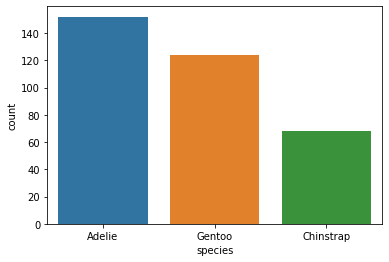

Categories present in island->


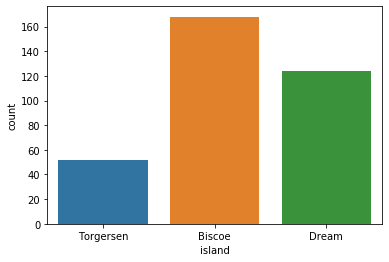

Categories present in sex->


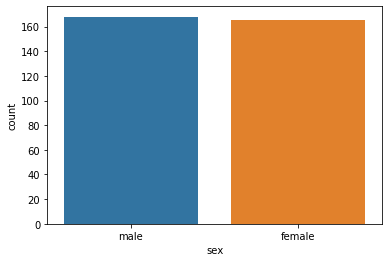

In [8]:
for i in df.select_dtypes(include='object').columns:
    print('Categories present in {}->'.format(i))
    sns.countplot(df[i])
    plt.show()

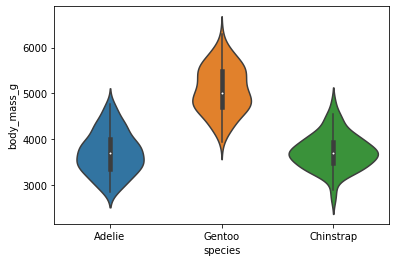

In [9]:
sns.violinplot(x=df['species'],y=df['body_mass_g'])
plt.show()

In [10]:
### Let us check out the NULL values and missing values in our dataset

In [11]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


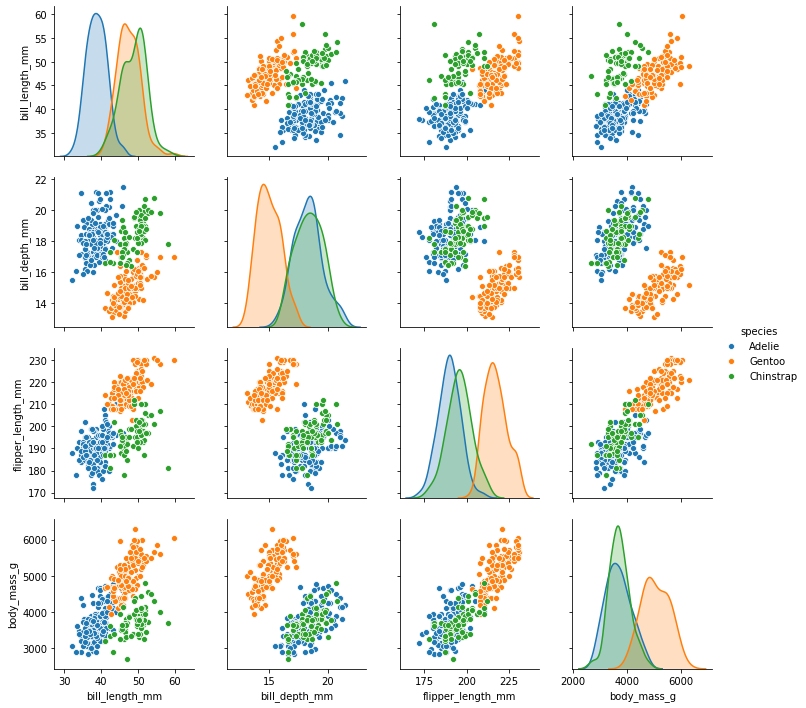

In [12]:
sns.pairplot(df,hue = 'species')

In [13]:
### Let us check out the correlation between the continous variables

In [14]:
cor=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()


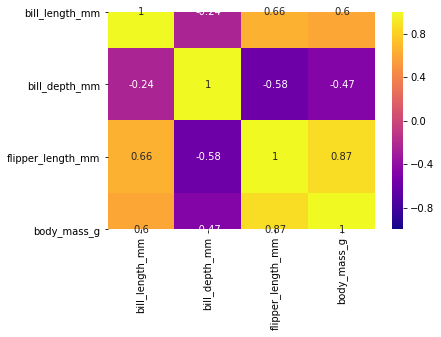

In [15]:
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)

In [16]:
### Function to convert Target as label

In [17]:
def func(a):
    dict_y= {'Adelie':0,'Gentoo':1,'Chinstrap':2}
    return(dict_y[a])

#### Let us import the necessary libraries that are needed for our analysis- we will be looking into make_pipeline and make_column_transformer

In [18]:
# Handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import KFold

In [19]:
target = df['species']
target=target.apply(func)
features = df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','sex']].copy()

features['sex'].fillna(features['sex'].value_counts().index[0], inplace=True)

In [20]:
###Splittling into train test split and since we have data imbalance we can also include stratify  parameter

In [21]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=100,stratify=target)  

Now we are going to do the following 
 1. To Simple Impute all the missing values for the numerical variables and we are going to impute CONSTANT values for SEX
 2. One hot encode the nominal variables -> ISLAND and SEX


 Column Transformers can be used 
 
 1. SimpleImputer
 2. One hot encoding
 3. Label encoding
 4. Scaling
 5. CountVectorizer
 6. Custom transformers are also available to suit our needs.
 
 Pro-tip ==> In case of pipeline and transformers if the column values contains NULL or N/A values always consider imputing them, before passing them to a column transformer for one hot encoding or scaling.
 
 The above can be achieved through creating a pipeline first then passing this pipeline as a parameter for column transfomer.
 If not you can directly pass them to the column transformer.
 
 Let us see that

In [22]:
# we have already seen that our varibale SEX has null or missing values let us impute it with constant now

In [23]:
imp_constant = SimpleImputer(strategy='constant',fill_value='missing')

In [24]:
ohe = OneHotEncoder()
imp = SimpleImputer()

Create a pipeline by first passing the Imputer and then the transformer

In [25]:
imp_ohe = make_pipeline(imp_constant, ohe)

Name out the columns, Numerical columns and categorical features separately

In [26]:
numerical_features = features.dtypes == 'float'
categorical_features = ~numerical_features

This is the column transformer which is available in sklearn - 0.23 -- Here you can pass the object followed by the column names that needs imputing/one hot encoding.
Scaling can also be used for numerical columns.

In [27]:
ct = make_column_transformer(
    (imp_ohe, ['island', 'sex']),
    (imp, numerical_features),
    remainder='passthrough')

In the above functionality we are using the parameter - remainder= 'passthrough' ,this will not apply to other columns 

There are other parameter available as well let us check them out

In [28]:
ct.fit_transform(X_train)

array([[0.00e+00, 1.00e+00, 0.00e+00, ..., 1.95e+01, 1.96e+02, 3.90e+03],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.79e+01, 1.90e+02, 3.45e+03],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.58e+01, 2.19e+02, 5.50e+03],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.56e+01, 2.21e+02, 5.10e+03],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.37e+01, 2.10e+02, 4.30e+03],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.85e+01, 1.80e+02, 3.55e+03]])

If you want to see the named transformers this function can be used

In [29]:
ct.named_transformers_

{'pipeline': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('onehotencoder', OneHotEncoder())]),
 'simpleimputer': SimpleImputer()}

#### If you want to deep dive and see how our column names are being transformed for One hot encoding here is the syntax:

In [30]:
ct.named_transformers_['pipeline'].named_steps['onehotencoder'].get_feature_names()

array(['x0_Biscoe', 'x0_Dream', 'x0_Torgersen', 'x1_female', 'x1_male'],
      dtype=object)

Now we have created column transformers let us see how to add them to a pipeline

Step 1: Create an object of the ML algorithm you are going to execute.
    
Step 2: Make a pipeline by combining the column transformer and the object created for ML algorithm.
    
Step 3: Fit the model, this will have all the properties of the model.

Step 4: Pass the above and predict it against any new/test data set.

In [31]:
logreg= LogisticRegression(solver='liblinear',random_state=1) 
# Use class_weight parameter incase of data imbalance

In [32]:
pipe = make_pipeline(ct, logreg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['island', 'sex']),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g     

In [33]:

pipe.predict(X_test)
print("logistic regression score: %f" % pipe.score(X_test, y_test))

logistic regression score: 0.971154


To have a look at what is happening inside of a Pipeline

In [34]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['island', 'sex']),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g     

In [35]:
pipe.named_steps.keys()

dict_keys(['columntransformer', 'logisticregression'])

In [36]:
pipe.named_steps.columntransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['island', 'sex']),
                                ('simpleimputer', SimpleImputer(),
                                 island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                  False
dtype: bool)])

In [37]:
pipe.named_steps.logisticregression

LogisticRegression(random_state=1, solver='liblinear')

In [38]:
### We can also look at the logistic regression co-efficients now

In [39]:
pipe.named_steps.logisticregression.coef_

array([[-1.22543277e-01, -7.32448819e-01,  9.41940594e-01,
        -3.57738132e-01,  4.44686630e-01, -1.10729401e+00,
         1.91961230e+00,  6.11266449e-02,  6.20986487e-04],
       [ 2.46847798e-01, -1.53787434e-01, -1.26644034e-01,
         1.27323076e-01, -1.60906746e-01, -9.78078073e-03,
        -1.79777365e+00,  5.16948619e-02,  4.34566842e-03],
       [-3.72310506e-01,  9.93222609e-01, -6.78789246e-01,
         9.00072574e-02, -1.47884401e-01,  1.70346392e+00,
        -6.54202627e-01, -1.47921627e-01, -9.68077614e-03]])

In [40]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns


In [41]:
onehot_columns = list(ct.named_transformers_['pipeline'].named_steps['onehotencoder'].get_feature_names())

In [42]:
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

To View how our pipeline has done imputation,we can visualize them directly so as to infer what all transformation our data went through


In [43]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['island', 'sex']),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                  False
dtype: bool)])),
                ('logisticregression',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [44]:
import eli5

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:

eli5.explain_weights(pipe.named_steps['logisticregression'], top=10, feature_names=numeric_features_list)

Explanation(estimator="LogisticRegression(random_state=1, solver='liblinear')", description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x0_Torgersen', weight=1.919612299450072, std=None, value=None), FeatureWeight(feature='flipper_length_mm', weight=0.941940594030286, std=None, value=None), FeatureWeight(feature='x0_Biscoe', weight=0.4446866299962551, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.08694849819343711, std=None, value=None), FeatureWeight(feature='x1_female', weight=0.06112664485497117, std=None, value=None), FeatureWeight(feature='x1_male', weight=0.0006209864874010737, std=None, value=None)], neg=[FeatureWeight(feature='x0_Dream', weight=-1.1072940132281082, std=None, value=None), FeatureWeight(feature='bill_depth_mm', weight=-0.7324488186519873, std=None, value=None), FeatureWeight(feature='body_mass_g', weight=-0.35773813180281794, std=None, value=None), FeatureWeight(feature='bill_length_mm', weight=-0.12254327718486117, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='bill_length_mm', weight=0.24684779766470893, std=None, value=None), FeatureWeight(feature='body_mass_g', weight=0.12732307638945892, std=None, value=None), FeatureWeight(feature='x1_female', weight=0.05169486185002019, std=None, value=None), FeatureWeight(feature='x1_male', weight=0.004345668415951808, std=None, value=None)], neg=[FeatureWeight(feature='x0_Torgersen', weight=-1.7977736453350188, std=None, value=None), FeatureWeight(feature='x0_Biscoe', weight=-0.16090674644748731, std=None, value=None), FeatureWeight(feature='bill_depth_mm', weight=-0.1537874338920211, std=None, value=None), FeatureWeight(feature='flipper_length_mm', weight=-0.12664403383071626, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-0.03358367005802841, std=None, value=None), FeatureWeight(feature='x0_Dream', weight=-0.009780780728490621, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=2, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x0_Dream', weight=1.7034639243610454, std=None, value=None), FeatureWeight(feature='bill_depth_mm', weight=0.9932226093002906, std=None, value=None), FeatureWeight(feature='body_mass_g', weight=0.09000725742663232, std=None, value=None)], neg=[FeatureWeight(feature='flipper_length_mm', weight=-0.6787892462894201, std=None, value=None), FeatureWeight(feature='x0_Torgersen', weight=-0.6542026270808712, std=None, value=None), FeatureWeight(feature='bill_length_mm', weight=-0.3723105064738896, std=None, value=None), FeatureWeight(feature='x1_female', weight=-0.14792162658599414, std=None, value=None), FeatureWeight(feature='x0_Biscoe', weight=-0.14788440088965082, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-0.057877143463018414, std=None, value=None), FeatureWeight(feature='x1_male', weight=-0.009680776136498169, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [46]:
#!pip install scikit-lego

In [47]:
#sklego.pandas_utils.log_step a useful decorator to log your pipeline steps

In [48]:
#from sklego.datasets import load_penguins
##df_penguin=load_penguins()

In [49]:
#Grid Search CV and cross_val_Score can also be performed using pipe
from sklearn.model_selection import GridSearchCV

In [50]:
#For tuning a pipeline, so we should know the step names inside the pipeline
pipe.named_steps.keys()

dict_keys(['columntransformer', 'logisticregression'])

In [51]:
params = {}
params['logisticregression__penalty'] = ['l1','l2']
params['logisticregression__C'] = [0.1, 1, 10]
params

{'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__C': [0.1, 1, 10]}

#Steps to be observed for the paramter tuning is that

Step 1: Create a dictionary for parameter tuning

Step 2: Step name has to be created followed by two underscores and finally the paramater name , for eg in the above logisticregression followed by penalty (here it is the parameter that is used)

In [53]:
gd_Search= GridSearchCV(pipe, params, cv=5, scoring='accuracy')
gd_Search.fit(X_train,y_train);

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
Output_df = pd.DataFrame(gd_Search.cv_results_)
Output_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058406,0.040556,0.010982,0.000023,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.979167,1.0,0.979167,1.0,0.979167,0.987500,0.010206,6
1,0.022142,0.004488,0.009685,0.002066,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.979167,1.0,0.979167,1.0,1.000000,0.991667,0.010206,4
2,0.037181,0.011389,0.008814,0.002319,1,l1,"{'logisticregression__C': 1, 'logisticregressi...",0.979167,1.0,1.000000,1.0,1.000000,0.995833,0.008333,3
3,0.024689,0.001893,0.009208,0.001220,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.979167,1.0,1.000000,1.0,0.979167,0.991667,0.010206,4
4,0.046602,0.011019,0.007926,0.002957,10,l1,"{'logisticregression__C': 10, 'logisticregress...",1.000000,1.0,1.000000,1.0,0.979167,0.995833,0.008333,2
5,0.022537,0.006773,0.009167,0.002466,10,l2,"{'logisticregression__C': 10, 'logisticregress...",1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.000000,1


In [55]:
Output_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.022537,0.006773,0.009167,0.002466,10,l2,"{'logisticregression__C': 10, 'logisticregress...",1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.000000,1
4,0.046602,0.011019,0.007926,0.002957,10,l1,"{'logisticregression__C': 10, 'logisticregress...",1.000000,1.0,1.000000,1.0,0.979167,0.995833,0.008333,2
2,0.037181,0.011389,0.008814,0.002319,1,l1,"{'logisticregression__C': 1, 'logisticregressi...",0.979167,1.0,1.000000,1.0,1.000000,0.995833,0.008333,3
1,0.022142,0.004488,0.009685,0.002066,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.979167,1.0,0.979167,1.0,1.000000,0.991667,0.010206,4
3,0.024689,0.001893,0.009208,0.001220,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.979167,1.0,1.000000,1.0,0.979167,0.991667,0.010206,4
0,0.058406,0.040556,0.010982,0.000023,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.979167,1.0,0.979167,1.0,0.979167,0.987500,0.010206,6


In [56]:
#Like we discussed before,let us try to see the contents in our named transformer
pipe.named_steps.columntransformer.named_transformers_

{'pipeline': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('onehotencoder', OneHotEncoder())]),
 'simpleimputer': SimpleImputer()}